# Homework 1 Regression
**Due Date: 10/16/2017**

Name: Gosuddin Siddiqi <br>
Student Number: 1627383

In [3]:
using PyPlot

## Problem 1: Linear Regression
Fill in the blanks to implement gradient descent algorithm to solve linear regression problem,
$$\min_x f_{\text{linear}}(x):=\frac{1}{2}\|\mathbf{F}x - \mathbf{r}\|^2 + \frac{\lambda}{2}\|x\|^2.$$

In [4]:
# Construct linear regression data
srand(123);
σ = 0.05;
m_linear = 500;
n_linear = 100;
F_linear = randn(m_linear,n_linear);
xt_linear = randn(n_linear);
r_linear = F_linear*xt_linear + σ*randn(m_linear);
λ_linear = 0.01;

In [5]:
# Define functions
function f_linear(x)
    return 0.5*sumabs2(F_linear*x - r_linear) + 0.5*λ_linear*sumabs2(x)
end

function ∇f_linear(x)
    # TODO: calculate and return gradient
    g = zeros(x);
    g = transpose(F_linear)*(F_linear*(x) - r_linear) + λ_linear*x
    return g
end

∇f_linear (generic function with 1 method)

In [6]:
# Gradient Descent Iteration
# TODO: calculate the step size
η_linear = 0.0;
# initialize variable and parameters
x_linear = zeros(n_linear);
g_linear = ∇f_linear(x_linear);
iterMax = 500;
tol = 1e-6;
his_linear = zeros(iterMax);
beta = norm(F_linear,2)^2 + λ_linear

noi = 1;
err = Inf;
for noi = 1:iterMax
    # TODO: gradient descent step 
    # ...
    # update convergence information
    x_linear = x_linear - (g_linear/beta)
    g_linear = ∇f_linear(x_linear);
    obj = f_linear(x_linear);
    err = vecnorm(g_linear);
    his_linear[noi] = err;
    noi%10 == 0 && @printf("iter %3d, obj %1.5e, err %1.5e\n", noi,obj,err);
    err < tol && break;
end
his_linear = his_linear[1:noi];

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sumabs2(::Array{Float64,1}) at ./deprecated.jl:57
 [3] f_linear at ./In[5]:3 [inlined]
 [4] macro expansion at ./In[6]:20 [inlined]
 [5] anonymous at ./<missing>:?
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /opt/julia_packages/.julia/v0.6/Compat/src/Compat.jl:464
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[6], in expression starting on line 14


iter  10, obj 1.82337e+01, err 8.67964e+01
iter  20, obj 1.29095e+00, err 9.59764e+00
iter  30, obj 1.04717e+00, err 1.40230e+00
iter  40, obj 1.04175e+00, err 2.20238e-01
iter  50, obj 1.04161e+00, err 3.56522e-02
iter  60, obj 1.04161e+00, err 5.87718e-03
iter  70, obj 1.04161e+00, err 9.81887e-04
iter  80, obj 1.04161e+00, err 1.65830e-04
iter  90, obj 1.04161e+00, err 2.82625e-05
iter 100, obj 1.04161e+00, err 4.85367e-06


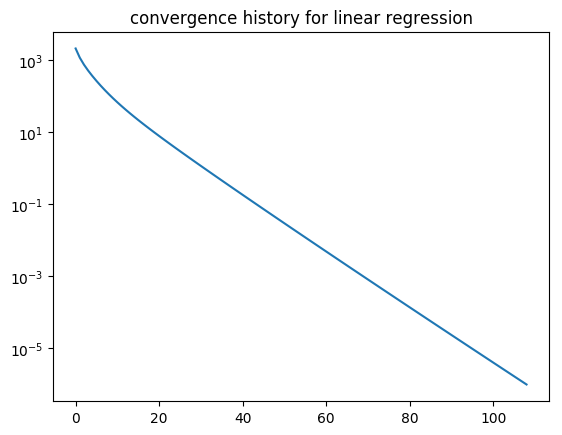

vecnorm(xt_linear - x_linear) = 0.02746055006628449


In [7]:
# compare result
@show vecnorm(xt_linear - x_linear);
# print convergence history
semilogy(his_linear)
title("convergence history for linear regression");

## Problem 2: LASSO
Fill in the blanks to implement proximal gradient descent algorithm to solve LASSO problem,
$$\min_x f_{\text{lasso}}(x):=\frac{1}{2}\|\mathbf{F}x - \mathbf{r}\|^2 + \lambda\|x\|_1.$$

In [8]:
# Construct LASSO variables
srand(123);
σ = 0.05;
m_lasso = 200;
n_lasso = 500;
k_lasso = 10;
F_lasso = randn(m_lasso,n_lasso);
xt_lasso = zeros(n_lasso);
for i = randperm(n_lasso)[1:k_lasso]
    xt_lasso[i] = rand([-1.0,1.0]);
end
r_lasso = F_lasso*xt_lasso + σ*randn(m_lasso);
λ_lasso = 10.0;

In [9]:
# Define functions
function f_lasso(x)
    return 0.5*sumabs2(F_lasso*x - r_lasso) + λ_lasso*sumabs(x)
end

function ∇f_lasso_smooth(x)
    # TODO: calculate and return gradient
    g = zeros(x)
    g = transpose(F_lasso)*(F_lasso*x - r_lasso)
    return g
end

function prox_1norm(x, κ)
    # TODO: compute the prox operator
    y = zeros(x);
    i = 1;
    for i = 1:length(y)
        if x[i] > κ
            y[i] = x[i] - κ;
        elseif x[i] < -κ
            y[i] = x[i] + κ;
        else
            y[i] = 0;           
        end
    end
    return y
end

prox_1norm (generic function with 1 method)

In [10]:
# Proximal Gradient Descent Iteration
# TODO: calculate the step size
η_lasso = 0.0;
# initialize variable and parameters
x_lasso = zeros(n_lasso);
x_lasso_old = zeros(n_lasso);
g_lasso = ∇f_lasso_smooth(x_lasso);
iterMax = 500;
tol = 1e-6;
his_lasso = zeros(iterMax);

#step size
step = 1.0/(norm(F_lasso,2)^2);

noi = 1;
err = Inf;
for noi = 1:iterMax
    # TODO: proximal gradient descent step 
    # ...
    # ...
    # update convergence information
    g_lasso = ∇f_lasso_smooth(x_lasso);
    x_lasso = prox_1norm((x_lasso - (step*g_lasso)), λ_lasso*step )
    obj = f_lasso(x_lasso);
    err = norm(x_lasso - x_lasso_old,2)/step #/η_lasso;
    copy!(x_lasso_old, x_lasso);
    his_lasso[noi] = err;
    noi%10 == 0 && @printf("iter %3d, obj %1.5e, err %1.5e\n", noi,obj,err);
    err < tol && break;
end
his_lasso = his_lasso[1:noi];

iter  10, obj 1.97058e+02, err 8.66725e+01
iter  20, obj 1.60671e+02, err 5.97826e+01


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sumabs2(::Array{Float64,1}) at ./deprecated.jl:57
 [3] macro expansion at ./In[10]:24 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /opt/julia_packages/.julia/v0.6/Compat/src/Compat.jl:464
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[10], in expression starting on line 17


iter  30, obj 1.39079e+02, err 4.88951e+01
iter  40, obj 1.23426e+02, err 4.31449e+01
iter  50, obj 1.11512e+02, err 3.67088e+01
iter  60, obj 1.03297e+02, err 2.93384e+01
iter  70, obj 9.89641e+01, err 1.84687e+01
iter  80, obj 9.77111e+01, err 8.49211e+00
iter  90, obj 9.74923e+01, err 3.41651e+00
iter 100, obj 9.74651e+01, err 9.70558e-01
iter 110, obj 9.74628e+01, err 2.98437e-01
iter 120, obj 9.74626e+01, err 9.25438e-02
iter 130, obj 9.74626e+01, err 2.88363e-02
iter 140, obj 9.74625e+01, err 9.02023e-03
iter 150, obj 9.74625e+01, err 2.83197e-03
iter 160, obj 9.74625e+01, err 8.92400e-04
iter 170, obj 9.74625e+01, err 2.82268e-04
iter 180, obj 9.74625e+01, err 8.96254e-05
iter 190, obj 9.74625e+01, err 2.85689e-05
iter 200, obj 9.74625e+01, err 9.14239e-06
iter 210, obj 9.74625e+01, err 2.93706e-06
iter 220, obj 9.74625e+01, err 9.47153e-07


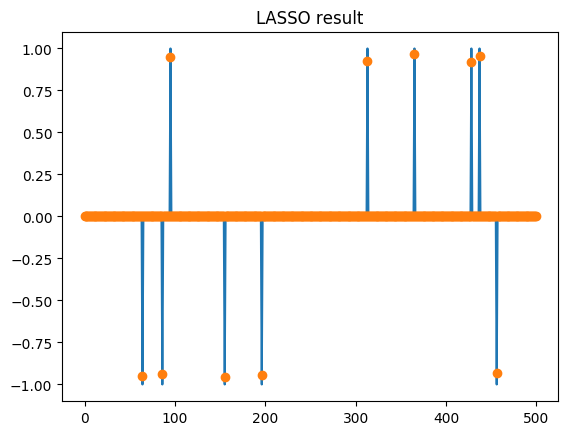

PyObject <matplotlib.text.Text object at 0x7f51e877bb10>

In [11]:
# plot result
plot(xt_lasso)
plot(x_lasso,"o")
title("LASSO result")

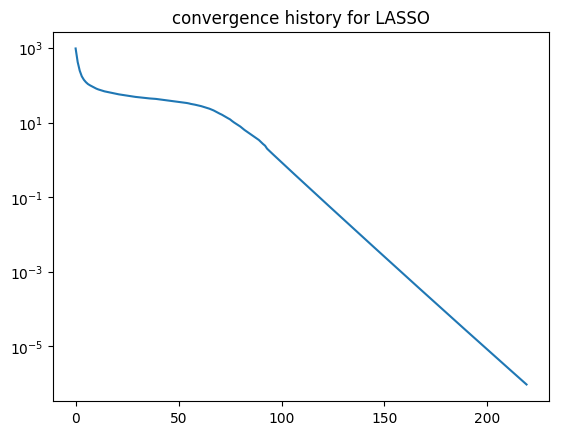

In [12]:
# plot convergence history
semilogy(his_lasso);
title("convergence history for LASSO");

## Problem 3: Robust Regression
Fill in the blanks to implement proximal gradient descent algorithm to solve robust regression problem,
$$\min_x f_{\text{robust}}(x):=\rho_\kappa\left(\mathbf{F}x - \mathbf{r}\right) + \lambda\|x\|_1.$$

In [13]:
# Construct Robust Regression variables
srand(123);
σ = 0.05;
m_robust = 200;
n_robust = 500;
k_robust = 10;
F_robust = randn(m_robust,n_robust);
xt_robust = zeros(n_robust);
for i = randperm(n_robust)[1:k_robust]
    xt_robust[i] = rand([-1.0,1.0]);
end
r_robust = F_robust*xt_robust + σ*randn(m_robust);
for i = randperm(m_robust)[1:k_robust]
    r_robust[i] += 5.0*randn();
end
λ_robust = 2.0;
κ_robust = 0.1;

In [14]:
# Define functions
function ρ(r)
    val = 0.0;
    i = 1;
    for i = 1:length(r)
        if r[i] > κ_robust
            val += κ_robust*abs(r[i]) - ((κ_robust^2)/2);
        else
            val += ((r[i]^2)/2);
        end
    end
    # TODO: return value for Huber function
    return val
end

function f_robust(x)
    return ρ(F_robust*x - r_lasso) + λ_robust*sumabs(x)
end

function ∇f_robust_smooth(x)
    # TODO: calculate and return gradient
    g = zero(x);
    y = F_robust*x - r_robust;
    i = 1;
    for i = 1:length(y)
        if y[i]> κ_robust
            g[i] = κ_robust * sign(y[i]);
        else
            g[i] = y[i];
        end
    end
    
    g = transpose(F_robust)*y
    return g
end

∇f_robust_smooth (generic function with 1 method)

In [15]:
# Proximal Gradient Descent Iteration
# TODO: calculate the step size
η_robust = 0.0;
# initialize variable and parameters
x_robust = zeros(n_robust);
x_robust_old = zeros(n_robust);
g_robust = ∇f_robust_smooth(x_robust);
iterMax = 1000;
tol = 1e-6;
his_robust = zeros(iterMax);

step =  1.0 / (norm(F_lasso,2)^2)

noi = 1;
err = Inf;
for noi = 1:iterMax
    # TODO: gradient descent step 
    # ...
    # ...
    # update convergence information
    g_robust = ∇f_robust_smooth(x_robust);
    x_robust = prox_1norm(x_robust - step*g_robust, λ_robust*step)
    obj = f_robust(x_robust);
    err = vecnorm(x_robust - x_robust_old)/step;
    copy!(x_robust_old, x_robust);
    his_robust[noi] = err;
    noi%10 == 0 && @printf("iter %3d, obj %1.5e, err %1.5e\n", noi,obj,err);
    err < tol && break;
end
his_robust = his_robust[1:noi];

iter  10, obj 8.40641e+01, err 5.54231e+01


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sumabs(::Array{Float64,1}) at ./deprecated.jl:57
 [3] macro expansion at ./In[15]:23 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /opt/julia_packages/.julia/v0.6/Compat/src/Compat.jl:464
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[15], in expression starting on line 16


iter  20, obj 8.20724e+01, err 2.43419e+01
iter  30, obj 7.94768e+01, err 1.89423e+01
iter  40, obj 7.71558e+01, err 1.65921e+01
iter  50, obj 7.52941e+01, err 1.54862e+01
iter  60, obj 7.35349e+01, err 1.41205e+01
iter  70, obj 7.20493e+01, err 1.27930e+01
iter  80, obj 7.05650e+01, err 1.20755e+01
iter  90, obj 6.91721e+01, err 1.13837e+01
iter 100, obj 6.79353e+01, err 1.07748e+01
iter 110, obj 6.68531e+01, err 1.00552e+01
iter 120, obj 6.59290e+01, err 9.36080e+00
iter 130, obj 6.50633e+01, err 8.97370e+00
iter 140, obj 6.43245e+01, err 8.57069e+00
iter 150, obj 6.36057e+01, err 8.04409e+00
iter 160, obj 6.29443e+01, err 7.74310e+00
iter 170, obj 6.23674e+01, err 7.39817e+00
iter 180, obj 6.18412e+01, err 7.13619e+00
iter 190, obj 6.13484e+01, err 6.89293e+00
iter 200, obj 6.09182e+01, err 6.59939e+00
iter 210, obj 6.05484e+01, err 6.34395e+00
iter 220, obj 6.02128e+01, err 6.10533e+00
iter 230, obj 5.98837e+01, err 5.90608e+00
iter 240, obj 5.95660e+01, err 5.77698e+00
iter 250, o

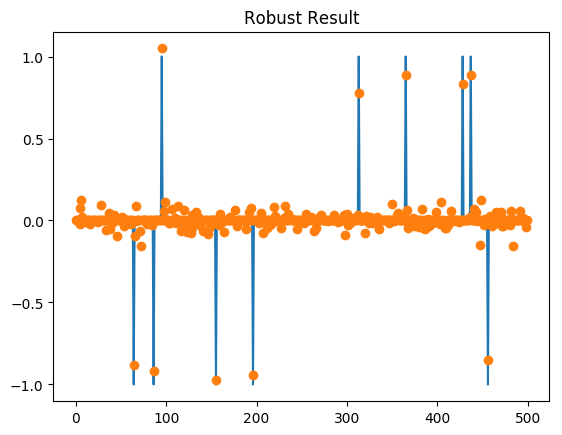

In [16]:
# plot result
plot(xt_robust);
plot(x_robust,"o");
title("Robust Result");

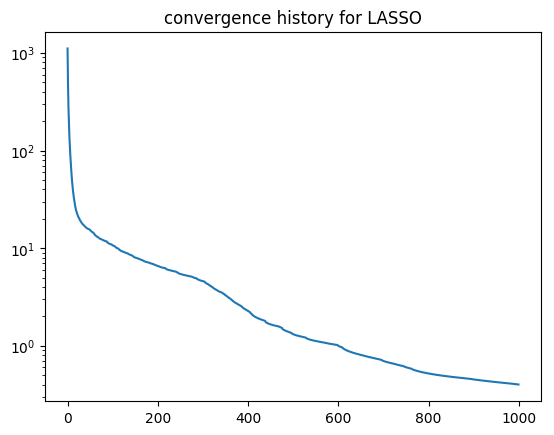

In [17]:
# plot convergence history
semilogy(his_robust);
title("convergence history for LASSO");

## Problem 5: Logistic Regression
Fill in the blanks to implement proximal gradient descent algorithm to solve logistic regression problem,
$$\min_x f_{\text{logistic}}(x):= \sum_{i=1}^m\left\{\log\left(1+\exp{\left\langle f^i, x\right\rangle}\right) - s^i\left\langle f^i,x\right\rangle\right\} + \frac{\lambda}{2}\|x\|^2$$
where $s^i\in\{0,1\}$ indicate the buy or sell.

For this problem we will use real data come from [Numerai](https://numer.ai/leaderboard).
The data set consist of three parts, train data, validation data and test data.

In [18]:
# function that read data
function readdata(filename, datatype, dsize)
    fid = open(filename, "r");
    data = read(fid, datatype, dsize);
    close(fid);
    return data
end

readdata (generic function with 1 method)

In [19]:
# read data
n_features = 50;
m_train = 2000;
m_validate = 500;
m_test = 500;

train_features = readdata("numerai_datasets/train_features.bin", Float64, m_train*n_features);
train_target = readdata("numerai_datasets/train_target.bin", Float64, m_train);
validate_features = readdata("numerai_datasets/validate_features.bin", Float64, m_validate*n_features);
validate_target = readdata("numerai_datasets/validate_target.bin", Float64, m_validate);
test_features = readdata("numerai_datasets/test_features.bin", Float64, m_test*n_features);
test_target = readdata("numerai_datasets/test_target.bin", Float64, m_test);

train_features = reshape(train_features, m_train, n_features);
validate_features = reshape(validate_features, m_validate, n_features);
test_features = reshape(test_features, m_test, n_features);

### Train and Validate Data
Doing regression on training data with different $\lambda$, and test it on the validation data set. Pick the $\lambda$ that has the smallest error.

In [20]:
# Define functions
function f_logistic(x, λ)
    r = train_features*x;
    return sum(log(1.0 + exp(r))) - dot(train_target,r) + 0.5*λ*sumabs2(x)
end

function ∇f_logistic(x, λ)
    # TODO: calculate and return gradient
    g = zeros(x);
    r = train_features*x;
    #@show 1.0 ./(1.0 + exp(-r))
    g = transpose(train_features)*(1.0 ./ (1.0+exp(-r)) - train_target) + (λ*x)
    return g
end

∇f_logistic (generic function with 1 method)

In [21]:
# build solver function
# TODO: calculate the step size
η_logistic = 0.0;
function logistic_solver(x, λ)
    # initialize variable and parameters
    x⁻ = copy(x);
    g  = ∇f_logistic(x, λ);
    g⁻ = copy(g);
    
    step = 1.0 / (vecnorm(train_features)^2 + λ)
    
    iterMax = 200000;
    tol = 1e-6;
    his = zeros(iterMax);

    noi = 1;
    err = Inf;
    for noi = 1:iterMax
        x = x - step*g;
        # update convergence information
        g = ∇f_logistic(x, λ);
        obj = f_logistic(x, λ);
        err = vecnorm(g);
        his[noi] = obj;
        noi%10000 == 0 && @printf("iter %6d, obj %1.5e, err %1.5e\n", noi,obj,err);
        err < tol && break;
    end
    his = his[1:noi];
    return x, his
end

logistic_solver (generic function with 1 method)

In [22]:
# predict accuracy
function predErr(features, target, x)
    r = features*x;
    val = 0.0;
    for I in eachindex(r)
        (r[I] > 0.0 && target[I] == 0.0) && (val += 1);
        (r[I] < 0.0 && target[I] == 1.0) && (val += 1);
    end
    return val/length(r);
end

predErr (generic function with 1 method)

In [23]:
λ_set = [1.4, 1.2, 1.0, 0.8, 0.6, 0.4, 0.2];
x_set = fill(ones(n_features), length(λ_set));
validate = zeros(λ_set);
for i = 1:length(λ_set)
    λ = λ_set[i];
    println("============================ λ = $λ");
    i > 1 && (x_set[i] = copy(x_set[i-1]));
    x, his = logistic_solver(x_set[i], λ);
    validate[i] = predErr(validate_features, validate_target, x);
    x_set[i] = x;
end

============================ λ = 1.4


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] exp(::Array{Float64,1}) at ./deprecated.jl:57
 [3] ∇f_logistic(::Array{Float64,1}, ::Float64) at ./In[20]:12
 [4] logistic_solver(::Array{Float64,1}, ::Float64) at ./In[21]:7
 [5] macro expansion at ./In[23]:8 [inlined]
 [6] anonymous at ./<missing>:?
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at /opt/julia_packages/.julia/v0.6/Compat/src/Compat.jl:464
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [11] (::IJulia.##14#17)() at ./task.jl:335
while loading In[23], in expression starting on line 4


iter  10000, obj 1.35844e+03, err 2.95586e+00
iter  20000, obj 1.35703e+03, err 1.12008e+00
iter  30000, obj 1.35679e+03, err 5.03897e-01
iter  40000, obj 1.35674e+03, err 2.42204e-01
iter  50000, obj 1.35673e+03, err 1.19855e-01
iter  60000, obj 1.35673e+03, err 6.04228e-02
iter  70000, obj 1.35673e+03, err 3.09323e-02
iter  80000, obj 1.35673e+03, err 1.60554e-02
iter  90000, obj 1.35673e+03, err 8.43884e-03
iter 100000, obj 1.35673e+03, err 4.48582e-03
iter 110000, obj 1.35673e+03, err 2.40835e-03
iter 120000, obj 1.35673e+03, err 1.30418e-03
iter 130000, obj 1.35673e+03, err 7.11442e-04
iter 140000, obj 1.35673e+03, err 3.90504e-04
iter 150000, obj 1.35673e+03, err 2.15453e-04
iter 160000, obj 1.35673e+03, err 1.19383e-04
iter 170000, obj 1.35673e+03, err 6.63865e-05
iter 180000, obj 1.35673e+03, err 3.70263e-05
iter 190000, obj 1.35673e+03, err 2.07025e-05
iter 200000, obj 1.35673e+03, err 1.15999e-05
============================ λ = 1.2
iter  10000, obj 1.35543e+03, err 2.66800e-

### Test Data

In [31]:
mval, ind = findmin(validate);
x = x_set[ind];

@show mval,λ_set[ind]

(mval, λ_set[ind]) = (0.402, 0.6)


(0.402, 0.6)

#### For best λ = 0.6, we get prediction error as 40.2%

In [27]:
predErr(test_features, test_target, x)

0.456

The prediction error turns out to be 45.6%